##### Information-theretic analysis of language models (Fall 2022/3)


# Home Assignment 2

#### Topics:
- Lossless compression

#### Due: 14/12/2022 before the class

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: Elad Prager 

**Student ID**: 200865780

**Date**: 18/12/22

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
\newcommand{\Ycal}{\mathcal Y}
\newcommand{\Xcal}{\mathcal X}
\newcommand{\Zcal}{\mathcal Z}
\newcommand{\Wcal}{\mathcal W}
$


## 1. Compressing a Markov Source
In this question you will sample a sequence from a two-states Markov source and compress this sequence in a losslessly manner using several methods. The function ``sample_Markov_path`` below samples such a sequence. 

Use the transition matrix 
$$
Q = \begin{bmatrix} 1-\alpha & \alpha \\
\beta & 1- \beta
\end{bmatrix}
$$
and vector of initial probabilities $\begin{bmatrix} 1, 0 \end{bmatrix}$ (namely, you begin at state $0$). 


In [1]:
YOUR_ID_HERE = 200865780

In [2]:
!pip install dahuffman
import pandas as pd
import numpy as np
from scipy.stats import multinomial
from matplotlib import pyplot as plt
from dahuffman import HuffmanCodec

SEED = YOUR_ID_HERE

def sample_Markov_path(Q: np.ndarray, initial_probs: np.ndarray, n: int)->np.ndarray:
    """
    Sample from a path from a Markov chain
    
    Args:
        :Q:  transition probability matrix
        :initial_probs:  vector of probabilities of the initial state
        :n:  length of path
    
    Return:
        :xx:  sample from the Markov chain of length n
        
    """

    M = Q.shape[0]
    xx = np.zeros((n,M))

    prob_vec = initial_probs

    for i in range(n):
        xx[i] = multinomial.rvs(p=prob_vec, n=1, random_state=SEED+i)
        prob_vec = xx[i] @ Q

    return np.argmax(xx, 1)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
alpha = 0.1
beta = 0.05

Q = np.array([
    [1-alpha, alpha],
    [beta, 1-beta] 
])

initial_probs = [1, 0]  # start at state 0
X = sample_Markov_path(Q, initial_probs, n = 100)

print(X)

[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


(1) For this chain, find its stationary distribution and the entropy rate. Is the entropy rate smaller or larger than the entropy of the stationary distribution?

In [4]:
def h2(p):
    return -p * np.log2(p) - (1-p) * np.log2(1-p)

mu = np.array([beta/(alpha+beta), alpha/(alpha+beta), ])
entropy_rate = round(mu @ np.array([h2(alpha), h2(beta)]),3)

print("Empirical distribution of P(x=1): ", X.mean(0))
print("Empirical distribution of P(x=0): ", 1-X.mean(0))
print('-----------------------------------------------------')
print("Statioanry distribution of P(x=1): ", round(mu[1],3))
print("Statioanry distribution of P(x=0): ", round(mu[0],3))
print('-----------------------------------------------------')
print("Entropy of the statioanry distribution: ", round(h2(beta/(alpha+beta)),3))
print("Entropy Sanity check: ", round(h2(alpha/(alpha+beta)),3))
print('-----------------------------------------------------')
print("Entropy rate of the statioanry distribution: ", entropy_rate)

Empirical distribution of P(x=1):  0.64
Empirical distribution of P(x=0):  0.36
-----------------------------------------------------
Statioanry distribution of P(x=1):  0.667
Statioanry distribution of P(x=0):  0.333
-----------------------------------------------------
Entropy of the statioanry distribution:  0.918
Entropy Sanity check:  0.918
-----------------------------------------------------
Entropy rate of the statioanry distribution:  0.347


**I've recived the following results: <br> Statioanry distribution of P(x=1):  0.667 <br> Statioanry distribution of P(x=0):  0.333 <br> Entropy of the statioanry distribution:  0.918 <br> Entropy rate of the statioanry distribution:  0.347 <br> <br> As we can see, the entropy rate is smaller than the entropy of the stationary distribution**

(2) Set the ``SEED`` as your id number. With $\alpha=.1$ and $\beta=.05$, generate a binary string of length $n=2^{14}$ from this soruce (using the function ``sample_Markov_path``). What is the fraction of times you spend at each state? verify that this fraction matched more or less the stationary distribution. 

A short sample from the Markov chain (set $n = 2^{14}$ when solving the assignment):

In [5]:
binary_length = 2**14
X = sample_Markov_path(Q, initial_probs, n = binary_length)
print("First 100 symbols:")
print(X[:100])

First 100 symbols:
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
len(X)

16384

In [7]:
plt.rcParams["figure.figsize"] = (5,3)

fraction of times spend at the zero state: 0.341
fraction of times spend at the one state: 0.659
------------------------------------------------------------------------------------
diff between that fraction to the stationary distribution for the zero state: 0.01
diff between that fraction to the stationary distribution for the one state: -0.01



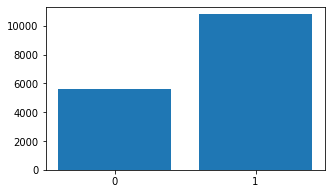

In [8]:
zeros = (X == 0).sum()
ones = (X == 1).sum()

zeros_freq = round(zeros/(zeros+ones),3)
ones_freq = round(ones/(zeros+ones),3)

print(f"fraction of times spend at the zero state: {zeros_freq}")
print(f"fraction of times spend at the one state: {ones_freq}")
print('------------------------------------------------------------------------------------')
print(f"diff between that fraction to the stationary distribution for the zero state: {round(zeros_freq-mu[0],2)}")
print(f"diff between that fraction to the stationary distribution for the one state: {round(ones_freq-mu[1],2)}\n")

labels = ['0','1']
values = [zeros, ones]

plt.bar(labels, values)
plt.show()

**I've recived the following results: <br> fraction of times spend at the zero state: 0.341 <br> fraction of times spend at the one state: 0.659 <br> <br> As we can see from the difference, the fraction matched more or less to the stationary distribution.**

(3) Compress the binary string using a Huffman code for tuples of 8 symbols (one byte), i.e., consider the tensorized source with $K=8$. Estimate tuple frequenceies either from the data or directly from the model. Plot the frequencies of the $2^K$ tuples. Can you anticipate the compression rate (``bits_compressed`` / ``bits_original``) without actually do the encoding?  

In [9]:
n=8
tuples = np.array([int(str(X[idx:idx + n])[1:-1].replace(" ",""),2) for idx in range(0, len(X), n)])
binary_tuples = np.array([str(X[idx:idx + n])[1:-1].replace(" ","") for idx in range(0, len(X), n)])

In [10]:
len(tuples)

2048

In [11]:
binary_tuples[:10]

array(['00011111', '11111111', '11111111', '00111111', '10000000',
       '00000000', '11000011', '11111000', '00000000', '01111111'],
      dtype='<U8')

In [12]:
tuples[:10]

array([ 31, 255, 255,  63, 128,   0, 195, 248,   0, 127])

In [13]:
type(tuples[0])

numpy.int64

In [14]:
def count_tuples(tuples):
  counts = dict()
  for i in tuples:
    counts[i] = counts.get(i, 0) + 1
  return counts

In [15]:
counts = count_tuples(tuples)

In [16]:
binary_counts = count_tuples(binary_tuples)

In [17]:
counts_df = pd.DataFrame(counts.items(), columns=['decimal', 'count'])
counts_df['binary'] = binary_counts.keys()
counts_df['freq'] = counts_df['count'] / counts_df['count'].sum()
counts_df = counts_df.sort_values(by=['freq'],ascending=False)
counts_df

,decimal,count,binary,freq
1,255,944,11111111,0.460938
4,0,331,00000000,0.161621
14,240,57,11110000,0.027832
16,15,53,00001111,0.025879
9,254,51,11111110,0.024902
...,...,...,...,...
38,152,1,10011000,0.000488
52,220,1,11011100,0.000488
51,30,1,00011110,0.000488
49,27,1,00011011,0.000488


### Plot frequencies 

In [18]:
plt.rcParams["figure.figsize"] = (20,10)

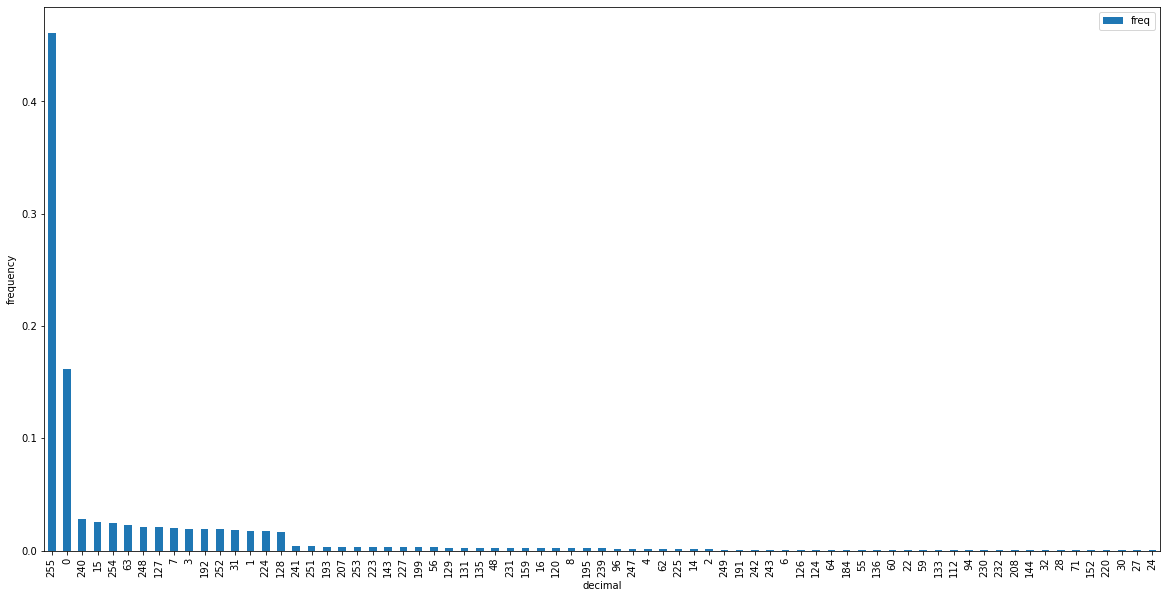

In [19]:
counts_df.plot.bar(x='decimal', y='freq')
plt.xlabel('decimal')
plt.ylabel('frequency')
plt.show()

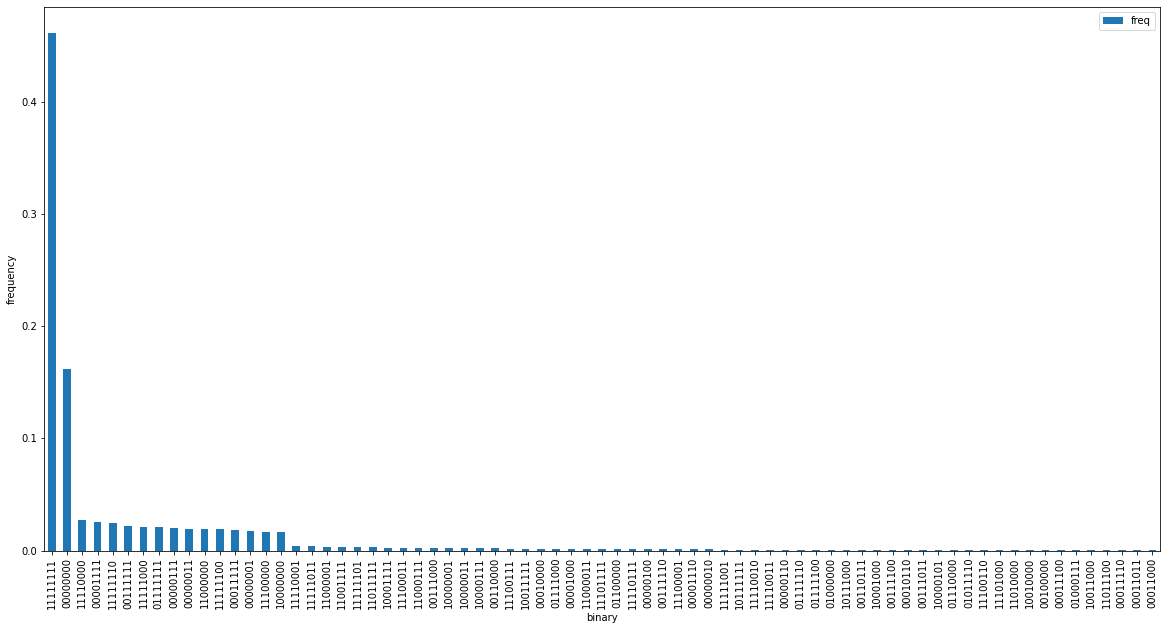

In [20]:
counts_df.plot.bar(x='binary', y='freq')
plt.xlabel('binary')
plt.ylabel('frequency')
plt.show()

In [21]:
codec = HuffmanCodec.from_frequencies(binary_counts)
codec.print_code_table()

Bits Code        Value Symbol
   1 0               0 '11111111'
   5 10000          16 '00111111'
   9 100010000     272 '00000010'
   9 100010001     273 '00000100'
   9 100010010     274 '00001110'
   9 100010011     275 '00111110'
   8 10001010      138 '00111000'
   9 100010110     278 '01100000'
   9 100010111     279 '11100001'
   8 10001100      140 '10001111'
   8 10001101      141 '11000111'
   8 10001110      142 '11100011'
  10 1000111100    572 '11101000'
  11 10001111010  1146 _EOF
  11 10001111011  1147 '00010110'
   9 100011111     287 '11110111'
   5 10010          18 '11111110'
   5 10011          19 '00001111'
   5 10100          20 '11110000'
   8 10101000      168 '11000001'
   8 10101001      169 '11001111'
   8 10101010      170 '11011111'
   8 10101011      171 '11111101'
  10 1010110000    688 '00000110'
  11 10101100010  1378 '00011000'
  11 10101100011  1379 '00011011'
   9 101011001     345 '00001000'
   9 101011010     346 '00010000'
  11 10101101100  1388 '

### compression rate estimation

In [22]:
def entropy(p):
    return -np.sum(p * np.log2(p))

In [23]:
freq = np.array(counts_df['freq'])
e = entropy(freq)
print(f'The entropy is: {round(e, 3)}')
compression_rate_minimum = round(e / 8, 3)
print(f'The minimal compression rate is: {compression_rate_minimum}')
compression_rate_maximum = round((e + 1)/8, 3)
print(f'The maximal compression rate is: {compression_rate_maximum}')

The entropy is: 3.338
The minimal compression rate is: 0.417
The maximal compression rate is: 0.542


**As we've studied the expected length of the compressed binary code is ranged as follows: $H(X) ≤ L ≤ H(X) + 1$. <br> The entropy is 3.338, therefore: $3.338 ≤ L ≤ 4.338$ <br> Since we're encoding tuples of 8 bits, we can divide by eight and conculde that the compression rate is ranged as follows: $0.417 ≤ compression-rate ≤ 0.542$**

In [24]:
def expected_code_length(codec, probs):
    tbl = codec.get_code_table()
    L = 0
    for k in probs:
        L += probs[k]*tbl[k][0]
    return L

In [25]:
probs = dict(zip(counts_df['binary'], counts_df['freq']))

In [26]:
expected_bits_per_tuple = expected_code_length(codec, probs)
print(f"The expected bits per tuple is: {round(expected_bits_per_tuple, 3)}")
print(f"The expected compression rate is: {round(expected_bits_per_tuple / 8, 3)}")

The expected bits per tuple is: 3.36
The expected compression rate is: 0.42


**We could also use the above function, in order to estimate the compression rate more precisely.**

### Encoding and Decoding

In [27]:
encoded = codec.encode(binary_tuples)
decoded = codec.decode(encoded)
assert decoded == list(binary_tuples)

In [28]:
original_bits = len(binary_tuples)*8
encoded_bits = len(encoded)*8

print(f"Length original: {original_bits} bits")
print(f"Length encoded: {encoded_bits} bits")
print("---------------------------------------")
print(f"Original bits per tuple: {len(binary_tuples[0])} bits")
print(f"Actual bits per tuple encoded: {round(len(encoded)*8/len(binary_tuples), 3)} bits")
print("---------------------------------------")
print(f"Redundancy: {round(1 - encoded_bits/original_bits, 3)}")
print(f'Compression rate: {round(encoded_bits/original_bits, 3)}')

Length original: 16384 bits
Length encoded: 6888 bits
---------------------------------------
Original bits per tuple: 8 bits
Actual bits per tuple encoded: 3.363 bits
---------------------------------------
Redundancy: 0.58
Compression rate: 0.42


**In order to verify the estimated compression rate, I've encoded the stream. As expected, the compression rate is: 0.42, which is within the given range**

(4) Compress the binary string using Run Length Encoding (RLE) with a maximal stretch of $2^k$. Namely, for $k=3$, the string 000001100011111111.... is encoded as (0,4), (1,1), (0,2), (1,7)..., which is then encoded as (0,100), (1,001), (0,010), (1,111), which is then encoded as 0100 1001 0010 1111 (each stretch of "1"s or "0"s is encoded using $1+k$ bits. We subtract one from the length of the stretch because there are no stretches of length 0). Stretches longer than $2^k$ are seperated into a stretch of $2^k$ and the remainder. Experiment with values of $k$ between 2-8 and report the compression rate for each $k$. Which $k$ attains the best compression rate?

### Experiment for K=3

In [29]:
def countConsecutive(arr, k):
    rle_tuple = []
    count = 1
    for i in range(len(arr) - 1):
        # If consecutive elements are same
        if (arr[i] == arr[i + 1]) and count < k:
            count += 1
            if i + 1 == len(arr) -1:
              rle_tuple.append((arr[i],count))
        else:
            rle_tuple.append((arr[i],count))
            count = 1
    return rle_tuple
    
rle_init_tuples = countConsecutive(X, 7)
rle_init_tuples[:10]

[(0, 3),
 (1, 7),
 (1, 7),
 (1, 7),
 (0, 2),
 (1, 7),
 (0, 7),
 (0, 7),
 (0, 1),
 (1, 2)]

In [30]:
rle_bin_tuples = [(k,bin(v)[2:].zfill(3)) for (k,v) in rle_init_tuples]
rle_bin_tuples[:10]

[(0, '011'),
 (1, '111'),
 (1, '111'),
 (1, '111'),
 (0, '010'),
 (1, '111'),
 (0, '111'),
 (0, '111'),
 (0, '001'),
 (1, '010')]

In [31]:
rle_final_tuples = [str(k)+v for (k,v) in rle_bin_tuples]
rle_final_tuples[:10]

['0011',
 '1111',
 '1111',
 '1111',
 '0010',
 '1111',
 '0111',
 '0111',
 '0001',
 '1010']

In [32]:
rle_tuples_flat = "".join([str(x) for x in rle_final_tuples])
rle_tuples_flat[:100]

'0011111111111111001011110111011100011010010011110111010111111111111111111111110001011111111111010111'

In [33]:
rle_original_bits = len(X)
rle_encoded_bits = len(rle_tuples_flat)

print(f"Length original: {rle_original_bits} bits")
print(f"Length encoded: {rle_encoded_bits} bits")
print("---------------------------------------")
print(f"Redundancy: {round(1 - rle_encoded_bits/rle_original_bits, 3)}")
print(f'Compression rate: {round(rle_encoded_bits/rle_original_bits, 3)}')

Length original: 16384 bits
Length encoded: 11436 bits
---------------------------------------
Redundancy: 0.302
Compression rate: 0.698


**First, i've experiment the RLE algo with K=3, and verified each step. Now I can safely run the experiment with values of  k  between 2-8 and report the compression rate for each  k**


### Experiment for K between 2-8

In [34]:
for K in range(2,8+1):
  print(f"Experiment for K={K}:\n")
  k_binary = {2: 3, 3: 7 ,4: 15, 5: 31, 6: 63, 7: 127, 8: 255}

  # build tuples
  rle_init_tuples = countConsecutive(X, k_binary[K])
  rle_bin_tuples = [(k,bin(v)[2:].zfill(K)) for (k,v) in rle_init_tuples]
  rle_final_tuples = [str(k)+v for (k,v) in rle_bin_tuples]
  rle_tuples = np.array([int(x,2) for x in rle_final_tuples])
  rle_binary_tuples = np.array(rle_final_tuples)
  print(rle_init_tuples[:10])
  print(rle_bin_tuples[:10])
  print(rle_final_tuples[:10])

  rle_tuples_flat = "".join([str(x) for x in rle_final_tuples])
  print(rle_tuples_flat[:100])

  # results
  rle_original_bits = len(X)
  rle_encoded_bits = len(rle_tuples_flat)

  print(f"Length original: {rle_original_bits} bits")
  print(f"Length encoded: {rle_encoded_bits} bits")
  print("---------------------------------------")
  print(f"Redundancy: {round(1 - rle_encoded_bits/rle_original_bits, 3)}")
  print(f'Compression rate: {round(rle_encoded_bits/rle_original_bits, 3)}')
  print("\n---------------------------------------------------------------------------------------------------------------------------------------------------------\n") 

Experiment for K=2:

[(0, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (0, 2), (1, 3)]
[(0, '11'), (1, '11'), (1, '11'), (1, '11'), (1, '11'), (1, '11'), (1, '11'), (1, '11'), (0, '10'), (1, '11')]
['011', '111', '111', '111', '111', '111', '111', '111', '010', '111']
0111111111111111111111110101111111010110110110110111100110011111111010110110110111111111111111111111
Length original: 16384 bits
Length encoded: 17514 bits
---------------------------------------
Redundancy: -0.069
Compression rate: 1.069

---------------------------------------------------------------------------------------------------------------------------------------------------------

Experiment for K=3:

[(0, 3), (1, 7), (1, 7), (1, 7), (0, 2), (1, 7), (0, 7), (0, 7), (0, 1), (1, 2)]
[(0, '011'), (1, '111'), (1, '111'), (1, '111'), (0, '010'), (1, '111'), (0, '111'), (0, '111'), (0, '001'), (1, '010')]
['0011', '1111', '1111', '1111', '0010', '1111', '0111', '0111', '0001', '1010']
00111111111111110

**The results show that the value of K with the best compression rate is: 5 <br> In particular, the compression rate for k=5 is: 0.463**

(5) Bonus: Can you think about a way to improve the proposed RLE?

**We can use LZ77 compression as an improvement for the proposed RLE. Both the LZ77 and RLE algorithms encode data by replacing repeated data elements with references. However, LZ77 should achieve a better compression rate than RLE because it uses dynamic sliding window techniques to look for repeating substrings, whereas RLE only looks for repeated values. <br> <br> In detail, LZ77 data compression is an algorithm used in data compression. It works by identifying repeated patterns in a given data stream and replacing them with a reference to the previous occurrence of the same pattern. <br><br> This is accomplished by using a sliding window that stores the most recently seen data. The algorithm then looks for matches, or “longest common subsequences”, in the window and encodes them as a reference to the data stored in the window. The reference consists of a length and a distance, which indicate how long the subsequence is and how far back in the window the subsequence was found. <br><br> The encoded data is then transmitted to the receiver, which can then decode it using the same algorithm. This reduces the amount of data that needs to be stored or transferred, resulting in improved storage and bandwidth efficiency.**


## 2. Guessing game and compression
In this question you should work with a simplified version of the text of pride and prejudice: lower case, no punctuation but with sentence limits. You can use the function ``simplify_text`` available below.

In [35]:
import numpy as np
import re
import pandas as pd

TOKEN_PATTERN = r"(?u)[a-zA-Z]+|\</?s\>"
SENT_START_TOKEN = '<s>'
SENT_END_TOKEN = '</s>'


def to_tokens(text: str) -> list:
    return re.findall(TOKEN_PATTERN, text.lower())


def normalize_text(text: str) -> str:
    """
    Remove/add dots to indicate sentence limits
    """
    
    text = re.sub("(Mrs?)\.", "\\1", text) # Mr/s. -> Mr/s
    text = re.sub("[!?]", ".", text) # !? -> .
    text = re.sub("(I+)\.", "\\1", text) # II. -> II
    text = re.sub("([a-zA-Z])\.([a-zA-Z])\.", "\\1\\2", text) #i.e.->ie e.g. -> eg
    return text

def add_sentence_limits(text: str, sep=r'\.') -> str:
    """
    Add SENT_START_TOKEN and SENT_END_TOKEN at the beginning and
    ending of every sentence. 
    
    Args:
        :text: is a text input
        :sep: explains how to identify sentnce ending (regular expression)
    """
    sentences = re.split(sep, normalize_text(text))
    sent_break = f' {SENT_END_TOKEN} {SENT_START_TOKEN} '
    return SENT_START_TOKEN + ' ' + sent_break.join(sentences) + ' ' + SENT_END_TOKEN


def simplify_text(text: str) -> str:
    """
    Returns a simplified version of the text:
     - lower case 
     - sentence limits marking
     - no punctuation or new lines
    """
    return " ".join(to_tokens(add_sentence_limits(text)))

In [36]:
from ngram import *

In [37]:
with open("/content/pride and prejudice.txt", 'rt') as f:
    text = f.read()
print("Number of tokens = ", len(text.split()))

Number of tokens =  124467


In [38]:
text_simplified = simplify_text(text)

In [39]:
model_1g = build_ngram_model(text_simplified, 1)

Cleaning text...
Extracting tokens...
Counting tokens...
Computing frequencies...
Built a model with 6513 1-grams


In [40]:
model_1g.head(10)

,count,freq
0,,
</s>,6212,0.044942
<s>,6212,0.044942
the,4511,0.032636
to,4245,0.030711
of,3728,0.026971
and,3650,0.026407
her,2226,0.016105
i,2070,0.014976
a,2006,0.014513


In [41]:
model_1g_df = model_1g.reset_index()
model_1g_df = model_1g_df.rename(columns={0: "tokens"})
model_1g_df['len'] = model_1g_df['tokens'].str.len()
model_1g_df.head(10)

,tokens,count,freq,len
0,</s>,6212,0.044942,4
1,<s>,6212,0.044942,3
2,the,4511,0.032636,3
3,to,4245,0.030711,2
4,of,3728,0.026971,2
5,and,3650,0.026407,3
6,her,2226,0.016105,3
7,i,2070,0.014976,1
8,a,2006,0.014513,1
9,in,1937,0.014014,2


In [42]:
avg_letters_per_word = np.sum(model_1g_df['len'].values * model_1g_df['freq'].values)
avg_letters_per_word

4.302361418587489

In [43]:
entropy_per_word = -np.sum(model_1g.freq * np.log2(model_1g.freq))
print("Entropy in bits per letter: ", entropy_per_word / avg_letters_per_word)

Entropy in bits per letter:  2.048538088196709


## Guessing game with word bigrams

(1) Build a word-bigram model based on the data; use this model to transform the text into a sequence of guess numbers. Plot the histogram of the sequence of guess numbers and report the entropy of the empirical distribution this histogram represents. 

In [44]:
model_2g = build_ngram_model(text_simplified, 2)

Cleaning text...
Extracting tokens...
Counting tokens...
Computing frequencies...
Built a model with 53899 2-grams


In [45]:
from tqdm import tqdm

def token2guesses(token: list, state: list, model)->int:
    # number of trials the model need
    # to correctly guess the token
    p_next_token = model.loc[state]  # list 
    p_next_token.loc[:, 'rnk'] = range(1, len(p_next_token)+1) # rank tokens
    return p_next_token.loc[token]['rnk']  #  return the rank of the

def encode_by_guesses(tokens: list, model: pd.DataFrame)->list:
    """
    Transform list of 
    """

    list_of_guesses = []
    prev_s = tokens[0] # the first symbol is always '<s>'

    for s in tqdm(tokens[1:]):
        list_of_guesses.append(token2guesses(s, prev_s, model))
        prev_s = s
    return list_of_guesses

In [46]:
tokens = to_tokens(text_simplified)
guesses = encode_by_guesses(tokens, model_2g)

  0%|          | 0/138221 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
100%|██████████| 138221/138221 [03:37<00:00, 634.12it/s]


In [47]:
tokens[:10]

['<s>',
 'chapter',
 'it',
 'is',
 'a',
 'truth',
 'universally',
 'acknowledged',
 'that',
 'a']

In [48]:
guesses[:10]

[26.0, 5.0, 2.0, 1.0, 481.0, 6.0, 1.0, 2.0, 14.0, 50.0]

In [49]:
tokens_guesses_df = pd.DataFrame([tokens, guesses]).T
tokens_guesses_df[:10]

,0,1
0,<s>,26.0
1,chapter,5.0
2,it,2.0
3,is,1.0
4,a,481.0
5,truth,6.0
6,universally,1.0
7,acknowledged,2.0
8,that,14.0
9,a,50.0


### Plot histogram

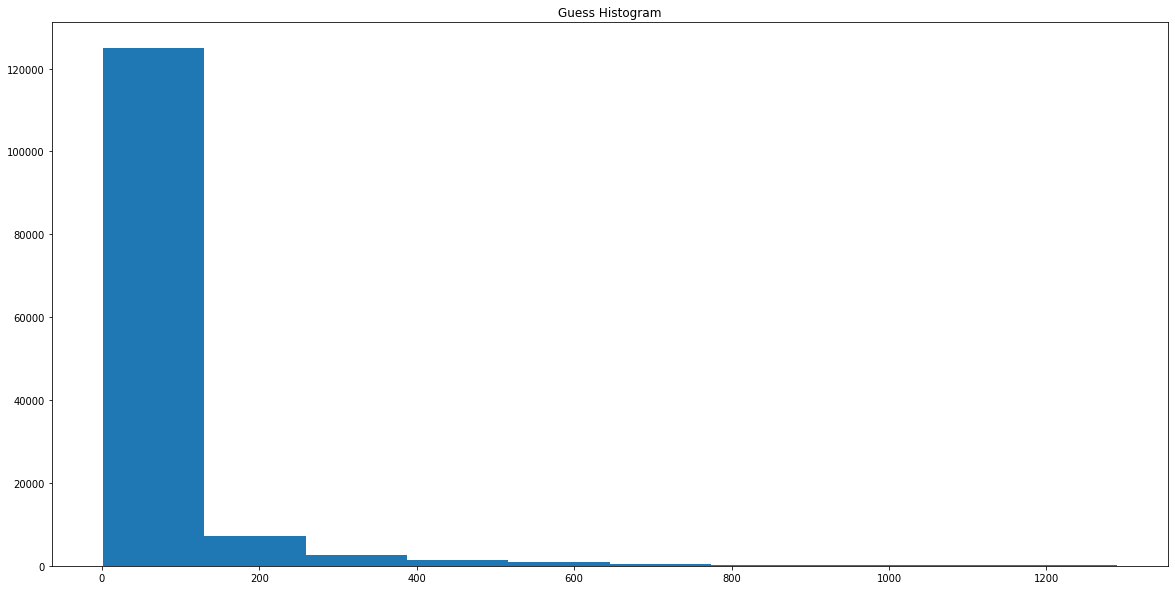

In [50]:
from matplotlib import pyplot as plt
plt.hist(guesses)
plt.title("Guess Histogram")
plt.show()

### Calculate Entropy

In [51]:
def entropy(probs):
    return -np.sum(probs[probs>0] * np.log2(probs[probs>0]))

df = pd.DataFrame(pd.DataFrame({'guess' : guesses}).value_counts('guess'), columns=['count'])
df['freq'] = df['count'] / df['count'].sum()

print("Entropy in bits per letter: ", round(entropy(df.freq) / avg_letters_per_word, 3))

Entropy in bits per letter:  1.355


**The entropy of the empirical distribution is: 1.355**

(2) Build a decoder that recovers the original text from the sequence of guesses; conclude that guessing + model is an invertible transformation. 

In [52]:
def guesses2tokens(guess, state: list, model)->int:
    p_next_token = model.loc[state]
    p_next_token.loc[:, 'rnk'] = range(1, len(p_next_token)+1)
    return p_next_token[p_next_token['rnk'] == guess].index[0]

def decode_by_guesses(guesses: list, model: pd.DataFrame)->list:
    list_of_tokens = ['<s>']
    prev_s = '<s>'

    for s in tqdm(guesses[:]):
        list_of_tokens.append(guesses2tokens(s, prev_s, model))
        prev_s = list_of_tokens[-1]
    return list_of_tokens

In [53]:
tokens_decoded = decode_by_guesses(guesses, model_2g)

  0%|          | 0/138221 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
100%|██████████| 138221/138221 [03:38<00:00, 633.25it/s]


In [54]:
assert tokens_decoded == tokens

**As we can see by the assert function, we've received an invertible transformation, where the decoded tokens stream from the model is equal to our original tokens stream.**

## Huffman coding

(3) Compress the sequence of guesses using a Huffman code. What is the average number of bits per **letter**?

In [55]:
guesses_space = [int(x) for x in guesses]

In [56]:
guesses_counts = dict()
for i in guesses_space:
  guesses_counts[i] = guesses_counts.get(i, 0) + 1

In [57]:
guesses_counts_df = pd.DataFrame(guesses_counts.items(), columns=['guesses', 'count'])
guesses_counts_df['freq'] = guesses_counts_df['count'] / guesses_counts_df['count'].sum()
guesses_counts_df = guesses_counts_df.sort_values(by=['freq'], ascending=False)
guesses_counts_df

,guesses,count,freq
3,1,31437,0.227440
2,2,12785,0.092497
24,3,8600,0.062219
9,4,6225,0.045037
1,5,4924,0.035624
...,...,...,...
636,1151,1,0.000007
631,1104,1,0.000007
1092,1083,1,0.000007
626,1130,1,0.000007


In [58]:
guesses_codec = HuffmanCodec.from_frequencies(guesses_counts)
guesses_codec.print_code_table()

Bits Code              Value Symbol
   3 000                   0 2
   5 00100                 4 7
   8 00101000             40 41
  11 00101001000         328 193
  13 0010100100100      1316 392
  13 0010100100101      1317 393
  12 001010010011        659 272
  11 00101001010         330 191
  11 00101001011         331 192
   9 001010011            83 70
   9 001010100            84 69
  12 001010101000        680 273
  12 001010101001        681 274
  11 00101010101         341 183
  11 00101010110         342 184
  11 00101010111         343 185
  11 00101011000         344 186
  11 00101011001         345 187
  11 00101011010         346 188
  11 00101011011         347 189
  11 00101011100         348 190
  12 001010111010        698 275
  12 001010111011        699 271
  10 0010101111          175 114
   6 001011               11 13
   9 001100000            96 68
  11 00110000100         388 181
  11 00110000101         389 182
  13 0011000011000      1560 369
  13 00110000110

In [59]:
guesses_encoded = guesses_codec.encode(guesses_space)
guesses_decoded = guesses_codec.decode(guesses_encoded)
assert guesses_decoded == guesses_space

In [60]:
num_of_letters = len(text_simplified)
bits_per_num_of_letters =  8 *(guesses_encoded.__sizeof__() / num_of_letters)
print("Average bits per letter: ", round(bits_per_num_of_letters, 3))

Average bits per letter:  1.106


**Average number of bits per letter is: 1.106**